## Костюков Максим Сергеевич
Лабораторная работа номер 2
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию

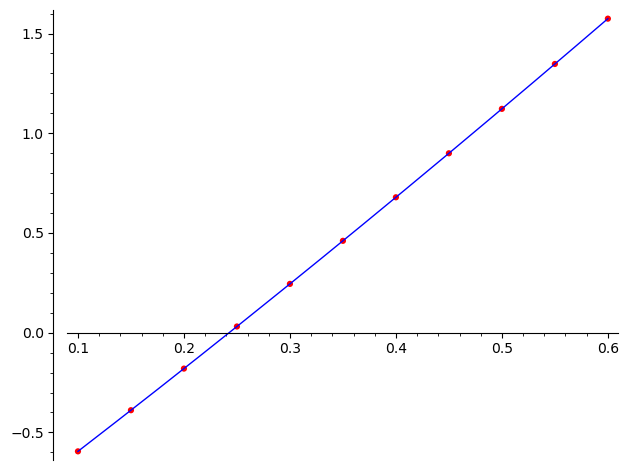

In [131]:
target_xs = [0.12, 0.57, 0.37]
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

In [132]:
def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[nodes[j]])/(x_axis[nodes[i]]-x_axis[nodes[j]])
        polinomial += sum_element
    return polinomial


Для `target_xs[0]` очевидно начало отрезка - ближайшая точка


In [133]:
t = (target_xs[0]-left_border) * 10 / (right_border - left_border)
print(t)

0.400000000000000


Очевидно релевантно использование 1-ой формулы Ньютона. Аналогичными рассуждениями получаем, что для `target_xs[2]` релевантно использование второй формулы Ньютона, поскольку она близка к концу отрезка
Напишем генератор конечных разностей вперед, а так же генератор разностей вперед для перенумерованных узлов

In [134]:
def findif(values):
    findifs = [[None for i in range(len(x_axis)-i)] for i in range(len(x_axis))]
    def get_divdif(n, starting_point):
        if findifs[starting_point][n] is not None:
            return findifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        findifs[starting_point][n]=(get_divdif(n-1, starting_point+1)-get_divdif(n-1, starting_point))
        return findifs[starting_point][n]
    return get_divdif


def reverse_findif(values):
    findifs = [[None for i in range(len(x_axis) - i)] for i in range(len(x_axis))]

    def get_divdif(n, starting_point):
        if findifs[starting_point][n] is not None:
            return findifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        findifs[starting_point][n] = (get_divdif(n - 1, starting_point) - get_divdif(n - 1, starting_point + 1))
        return findifs[starting_point][n]

    return get_divdif

findiffer = findif(values)
reverse_findiffer = reverse_findif(list(reversed(values)))

In [135]:
def FirstNewton(target_x):
    t = (target_x-left_border) * steps_count / (right_border - left_border)
    newton_formula = 0
    for i in range(steps_count+1):
        sum_element = findiffer(i, 0)
        # print(sum_element)
        for j in range(i):
            sum_element *= (t-j)
        sum_element /= factorial(i)
        newton_formula += sum_element
    return newton_formula

In [136]:
def SecondNewton(target_x):
    t = (target_x-right_border) * steps_count / (right_border - left_border)
    newton_formula = 0
    for i in range(steps_count+1):
        sum_element = reverse_findiffer(i, 0)
        # print(sum_element)
        for j in range(i):
            sum_element *= (t+j)
        sum_element /= factorial(i)
        newton_formula += sum_element
    return newton_formula

In [137]:
print("Вычисленное занчение в первой точке по первой формуле Ньютона:")
print(FirstNewton(target_x=target_xs[0]))
print(y(x=target_xs[0]))
print("Вычисленное занчение во второй точке по второй формуле Ньютона:")
print(SecondNewton(target_x=target_xs[1]))
print(y(x=target_xs[1]))


Вычисленное занчение в первой точке по первой формуле Ньютона:
-0.512808635853867
-0.512808635853866
Вычисленное занчение во второй точке по второй формуле Ньютона:
1.43809902483773
1.43809902483773


Для третьей точки очевидно, что так как

In [138]:
t = (target_xs[2]-x_axis[5])*steps_count/(right_border-left_border)
print(t, "<= 0.5")

0.400000000000000 <= 0.5


релевантно применение первой формулы Гаусса.

In [139]:
def FirstGauss(target_x):
    t = (target_x-x_axis[5])*steps_count/(right_border-left_border)

    gauss_function = 0
    last_t = 1
    for i in range(0, steps_count+1, 2):
        sum_element1 = findiffer(i, 5-i//2)
        if i != steps_count:
            sum_element2 = findiffer(i+1, 5-i//2)
        sum_element1 *= last_t
        last_t *= (t+i//2)
        # for j in range(i):
        #     sum_element1 *= (t+j)
        sum_element1 /= factorial(i)
        if i != steps_count:
            sum_element2*=last_t
            last_t *= (t-i//2-1)
            # for j in range(i+1):
            #     sum_element2 *= (t+j)
            sum_element2 /= factorial(i+1)
        gauss_function += sum_element1
        if i != steps_count:
            gauss_function += sum_element2

    return gauss_function

In [140]:
print("Вычисленное значение во второй точке по первой формуле Гаусса")
print(FirstGauss(target_x=target_xs[2]))
print(y(x=target_xs[2]))

Вычисленное значение во второй точке по первой формуле Гаусса
0.547672654393966
0.547672654393966


In [141]:
def omega(n):
    omega = 1
    for i in range(n):
        omega *= (x-x_axis[i])
    return omega
R10 = diff(y, x, 11)/factorial(11)*omega(11)
print(R10)
R10_min = min([R10(x=x_axis[i]) for i in range(11)])
R10_max = max([R10(x=x_axis[i]) for i in range(11)])


-1/39916800*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)*(x - 0.350000000000000)*(x - 0.400000000000000)*(x - 0.450000000000000)*(x - 0.500000000000000)*(x - 0.550000000000000)*(x - 0.600000000000000)*sin(x)


Проверим условие для всех `x`

In [142]:
print(abs(FirstNewton(target_xs[0]) - y(x=target_xs[0])))
print(abs(R10_min-R10_max))
if (R10_min <= abs(FirstNewton(target_xs[0]) - y(x=target_xs[0])) <= R10_max):
    print("Первая формула Ньютона построена ВЕРНО")
else:
    print("Первая формула Ньютона построена НЕВЕРНО")
print(abs(SecondNewton(target_xs[1])-y(x=target_xs[1])))
if (R10_min <=  abs(SecondNewton(target_xs[1])-y(x=target_xs[1])) <= R10_max):
    print("Вторая формула Ньютона построена ВЕРНО")
else:
    print("Вторая формула Ньютона построена НЕВЕРНО")
print(abs(FirstGauss(target_xs[2])-y(x=target_xs[2])))
if (R10_min <=  abs(FirstGauss(target_xs[2])-y(x=target_xs[2])) <= R10_max):
    print("Первая формула Гаусса построена ВЕРНО")
else:
    print("Первая формула Гаусса построена НЕВЕРНО")

9.99200722162641e-16
0.000000000000000
Первая формула Ньютона построена НЕВЕРНО
4.44089209850063e-16
Вторая формула Ньютона построена НЕВЕРНО
1.11022302462516e-16
Первая формула Гаусса построена НЕВЕРНО
